## <center>Master 2 - MLDS - Paris Descartes </center>

## <center>Projet Apprentissage Supervisé </center>
<center><em>le 15 janvier 2019 avant minuit</em></center>

<b><big>Lucas Iscovici <span style="float:right">Mohamed Ben Hamdoune</span></big></b>

## <center>Le SUJET</center> 
### <center>Détection de fraude dans des transactions bancaires</center>

### <center>Objectif</center>
<center>L’objectif de ce travail est la mise en pratique concrète d’un certain nombre de techniques
d’apprentissage supervisé (<b>Bayesien Naïf, KNN, LDA, QDA, Linear SVM, Non Linear SVM,
Régression logistique, CART et Random Forest</b>), à travers l’étude d’un cas pratique nécessitant
l’utilisation de logiciels de traitement statistique de données <b>R ou python</b>.<br>L’application visée est :<br>
 <b>Détection de fraude dans des transactions bancaires</b> :<br> En résumé, il s’agit de travailler dans ce
projet sur une base de données décrivant des transactions bancaires sur une période donnée,
    l’objectif est la <b>détection des transactions frauduleuses</b>.<br>
    Je vous encourage à faire preuve d’<b>originalité</b> : vous pouvez très bien utiliser des modèles qui n’ont
pas été présentés au cours</center>

### <center>Travail à faire</center>
<center>Commencer par une <b>étude exploratoire</b> préliminaire<br>
Utiliser les différentes techniques de <b>classification supervisée</b> vue en cours pour créer un
<b>modèle de détection de la fraude</b>. Suivant les techniques utilisées (et les fonctions
disponibles sous R), vous pourrez utiliser l’ensemble des variables disponibles ou
uniquement les variables quantitatives, et réaliser ou non une <b>sélection de variables</b>.<br>
Comparer l’ensemble de ces techniques à l’aide de courbes ROC (<b>AUC</b>), évaluées soit par
<b>validation croisée</b> soit sur échantillon test</center>

### <center>Rapport</center>
<center>Le rapport du projet doit présenter de façon claire et concise:<br>
    l'<b>objet</b> de l'analyse<br>
    la <b>description des données</b> (individus/variables utilisées, variables supplémentaires etc.)<br>
    <b>l'analyse</b> proprement dite<br>
    les <b>commentaires sur les résultats</b> obtenus<br>
    </center>

## <center>L'ANALYSE </center>

### <center>Les Données</center>

<center>Le jeu de données contient les<b> transactions effectuées par cartes de crédit en septembre 2013</b> par les titulaires de carte
européennes. <br>Cet ensemble de données présente les transactions qui se sont produites <b>en deux jours</b>, où nous avons eu
    <b>492 fraudes sur 284 807 transactions</b>.<br> L'ensemble de données est <b>très déséquilibré</b>, les classes <b>positives (fraudes)
    représentent 0,172%</b> de toutes les transactions.<br> Il contient uniquement des <b>variables d'entrée</b> numériques <b>résultant
    d'une transformation PCA</b>. Les caractéristiques <b>V1, V2, ... V28 sont les composantes principales obtenues avec PCA</b>,
les seules <b>caractéristiques qui n'ont pas été transformées avec PCA sont 'Time' et 'Amount'</b>.<br> La variable <b>'Time'</b>
    contient les <b>secondes écoulées entre chaque transaction et la première transaction</b> de l'ensemble de données. La
    variable <b>'Amount'</b> est le Montant de la transaction, cette caractéristique peut être utilisée pour <em>l'apprentissage sensible
    aux coûts</em> dépendant de l'exemple. La fonction <b>'Class'</b> est la variable de réponse et prend la valeur <b>1 en cas de fraude et
    0 sinon</b>. Compte tenu du rapport de <b>déséquilibre de classes</b>, nous recommandons de <b>mesurer la précision en utilisant
    l'aire sous la courbe de rappel de précision (<em>AUPRC</em>)</b>. La précision de la matrice de confusion n'est pas significative
pour une classification non équilibrée.</center>

<center><h3>A Retenir: </h3></center>
- 2 jours de fraude 
    - Variable "Time"
       - Secondes -> voir si pattern temporel de fraude (matin ? soir?
- Fraude rare
    - Classe déséquilibré (492 fraudes sur 284 807 transactions) (0,172%)
        - AUPRC -> l'aire sous la courbe de rappel de précision
        - Attention au méthodes nécessitant des classes équilibré 
        - Voir d'éventuelle techniques pour lutter contre ce pb
- "Amount" -> voir si pattern avec la montant de la transaction pour la fraude
- Variables d'entrée sont les composantes principales d'une PCA
    - On ne peux pas capter le sens des composantes sans le nom des vrais variables ?
    - Ne "capture" que les liaisons linéaires
    - Revenir au données initiales ? à chercher mais pb visiblement si que pca pb?



### <center>Convention</center>

VOIR LES TODOS 

## <center>IMPORT</center> 

In [1]:
from pip import _internal as pip

from math import *
from collections import  Counter
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy 
import seaborn as sns


from sklearn.metrics import precision_recall_curve,auc,roc_auc_score,confusion_matrix
from sklearn.model_selection import train_test_split,RandomizedSearchCV,GridSearchCV,StratifiedKFold
from sklearn.pipeline import make_pipeline, Pipeline

from sklearn.preprocessing import scale

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis

from sklearn.manifold import *

from sklearn.linear_model import LogisticRegression, PassiveAggressiveClassifier, RidgeClassifier, SGDClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier,VotingClassifier 
from sklearn.neighbors import KNeighborsClassifier

from sklearn.tree import DecisionTreeClassifier

from sklearn.naive_bayes import BernoulliNB, GaussianNB
from sklearn.svm import SVC,LinearSVC
try:
    import scikitplot 
except:
    pip.main(["install","scikit-plot"])
    import scikitplot 
#USEFULL
from functools import partial
from tqdm import tqdm,tqdm_notebook

###  <center>USEFULL</center>

In [3]:
T=True
F=False

In [4]:
pd.Series.whereDrop = lambda self,b: self.where(b).dropna() 

## <center> EDA</center>

In [4]:
!ls data

creditcard.csv	    Projet_Apprentissage_Supervisé_1819.zip
creditcard.csv.zip  Projet_app_sup_MLDS1819_vf.pdf


In [5]:
data=pd.read_csv("./data/creditcard.csv")

In [6]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
Time      284807 non-null float64
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null float64
V25       284807 non-null float64
V26  

In [8]:
dataShape=data.shape

In [9]:
variablePasPC = ["Time","Amount","Class"]

In [10]:
dataPC=data.loc[:,~data.columns.isin(variablePasPC)]
dataPasPC=data.loc[:,data.columns.isin(variablePasPC)]

#### <center> V(PC) de la PCA</center>

In [11]:
dataPC.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 28 columns):
V1     284807 non-null float64
V2     284807 non-null float64
V3     284807 non-null float64
V4     284807 non-null float64
V5     284807 non-null float64
V6     284807 non-null float64
V7     284807 non-null float64
V8     284807 non-null float64
V9     284807 non-null float64
V10    284807 non-null float64
V11    284807 non-null float64
V12    284807 non-null float64
V13    284807 non-null float64
V14    284807 non-null float64
V15    284807 non-null float64
V16    284807 non-null float64
V17    284807 non-null float64
V18    284807 non-null float64
V19    284807 non-null float64
V20    284807 non-null float64
V21    284807 non-null float64
V22    284807 non-null float64
V23    284807 non-null float64
V24    284807 non-null float64
V25    284807 non-null float64
V26    284807 non-null float64
V27    284807 non-null float64
V28    284807 non-null float64
dtypes: float64(28)
m

Comme Pc -> que des float, et pas de missing data

In [12]:
minmaxavg=lambda x:x.agg([min,max,"mean"])

In [13]:
stdMinMaxPC=minmaxavg(dataPC.std())
stdMinMaxPC

min     0.330083
max     1.958696
mean    0.976391
dtype: float64

In [14]:
minMinMaxPC=minmaxavg(dataPC.min())
minMinMaxPC

min    -113.743307
max      -2.604551
mean    -28.058024
dtype: float64

In [15]:
maxMinMaxPC=minmaxavg(dataPC.max())
maxMinMaxPC

min       2.454930
max     120.589494
mean     21.540993
dtype: float64

In [16]:
minmaxavgPCA=pd.concat([stdMinMaxPC,minMinMaxPC,maxMinMaxPC],axis=1,keys=["std","min","max"])
minmaxavgPCA

,std,min,max
min,0.330083,-113.743307,2.454930
max,1.958696,-2.604551,120.589494
mean,0.976391,-28.058024,21.540993


ratio std - max - min  :

In [17]:
ratio=lambda a:a.max()/a.min()
minmaxRatio=minmaxavgPCA.append(
    pd.Series(list(map(ratio,[stdMinMaxPC,minMinMaxPC,maxMinMaxPC])),
              index=["std","min","max"],
              name="Ratio")
)
minmaxRatio

,std,min,max
min,0.330083,-113.743307,2.454930
max,1.958696,-2.604551,120.589494
mean,0.976391,-28.058024,21.540993
Ratio,5.933945,0.022898,49.121358


### TODO:
VOIR si scale les PC <br>

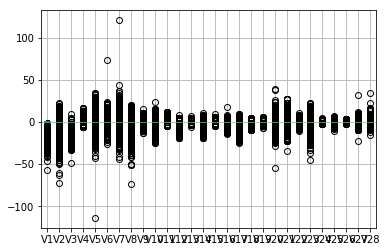

In [18]:
dataPC.boxplot()

un peu d'outlier A voir peux etre rapport avec fraudes

#### <center>TIME-AMOUNT-CLASS</center>

In [19]:
dataPasPC.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 3 columns):
Time      284807 non-null float64
Amount    284807 non-null float64
Class     284807 non-null int64
dtypes: float64(2), int64(1)
memory usage: 6.5 MB


Time et Amount Float a part Class int (binaire) 

In [20]:
dataClass=dataPasPC.Class

In [21]:
dataPasPcClass = dataPasPC[["Amount","Time"]]

In [22]:
dataPasPcClass.describe()

,Amount,Time
count,284807.000000,284807.000000
mean,88.349619,94813.859575
std,250.120109,47488.145955
min,0.000000,0.000000
25%,5.600000,54201.500000
50%,22.000000,84692.000000
75%,77.165000,139320.500000
max,25691.160000,172792.000000


### TODO:
std tres different (250 - 47500) ( X 190) -> scale <br>std tres different des PC (1) ( X 250 , X 47000)-> scale

In [23]:
dataClass_vc=dataClass.value_counts

In [24]:
dataClass_vcDF=pd.concat([dataClass_vc(),dataClass_vc(normalize=T)],
                         axis=1,
                         keys=["Class","Class (normalize)"]
                        )
dataClass_vcDF

,Class,Class (normalize)
0,284315,0.998273
1,492,0.001727


Comme prevu tres déséquilibré

Si on met que la classe 0 (donc pas de fraude) on a 99.8 % d'accuracy

#### <center>DUMMY</center>

In [25]:
baseline_dummy=dataClass_vcDF.iloc[0,1]
baseline_dummy

0.99827251436937992

##### <center>AUC</center>
Si on fait AUPRC <a href="https://machinelearningmastery.com/roc-curves-and-precision-recall-curves-for-classification-in-python/">Why ?</a>

In [5]:
#https://machinelearningmastery.com/roc-curves-and-precision-recall-curves-for-classification-in-python/
#AUCPR -> dOIT ETRE UTILISÉ SI classe déséquilibré
def AUCPRC(testy, probs,plot=F,withAUC=F,withACC=F):
    '''
    AUCPRC(
        true_labels [n_samples] ,
        probas [n_samples] ou decision function,
        plot=F
    )
    '''
    precision, recall, thresholds = precision_recall_curve(testy, probs)
    if plot:
        plt.plot([0, 1], [0.1, 0.1], linestyle='--')
        # plot the roc curve for the model
        plt.plot(recall, precision, marker='.')
        # show the plot
        plt.show()
    res = [("aucprc",auc(recall,precision))]
    if withAUC:
        res+=[("auc",roc_auc_score(testy, probs))]
    if withACC:
        cm=confusion_matrix(testy, probs)
        res+=[("acc",max(sum(np.diag(cm)),sum(np.diag(cm[::-1])))/np.sum(cm))]
    return res

In [ ]:
metrics=lambda a,b:AUCPRC(a,b,withACC=T,withAUC=T)

In [28]:
metricsDummy=metrics(dataClass,[1]*dataShape[0])
metricsDummy

[('aucprc', 0.50086374281530999), ('auc', 0.5), ('acc', 0.99827251436937992)]

pour l'instant quasiment pareil AUC ET AUCPRC 

In [29]:
baselineAUCPRC=metricsDummy[0][1]
baselineAUCPRC

0.50086374281530999

In [30]:
dummyMetrics=pd.DataFrame.from_records(metricsDummy,columns=["metrics","Dummy"],index="metrics").T
dummyMetrics

metrics,aucprc,auc,acc
Dummy,0.500864,0.5,0.998273


### <center>Scale</center>

In [31]:
_dataScale = scale(data.iloc[:,:-1])

In [32]:
dataScale=pd.DataFrame(_dataScale,columns=data.columns[:-1])

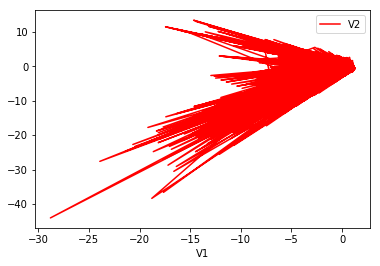

In [33]:
dataScale.plot("V1","V2",color=dataClass.map({0:"red",1:"blue"}).tolist());

on voit pas la fraude pas de blue

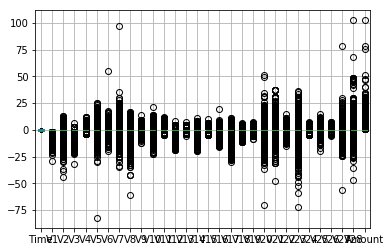

In [34]:
dataScale.boxplot()

bcp d'outlier

#### <center>Etude Corr avec class</center>

corr between binary and continious -> pearsonr [Why ?](https://medium.com/@outside2SDs/an-overview-of-correlation-measures-between-categorical-and-continuous-variables-4c7f85610365)

Cor pearson Asumption: absence of outliers, normality of variables, linearity, and homoscedasticity.

In [35]:
def criticalCorr(n,alpha=0.05):
    df=n-2
    t=scipy.stats.t.ppf([alpha/2],df)[0];
    t2=t**2
    st2=sqrt(t2)
    return st2/sqrt(t2+df)

look at corr and p_value (we want p_value < 0.05)

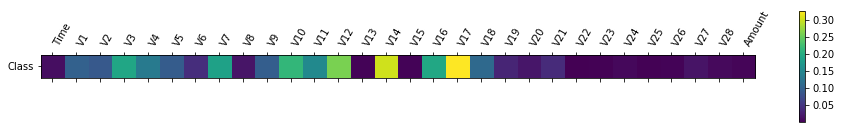

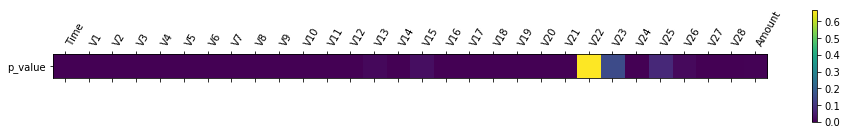

In [36]:
#https://medium.com/@outside2SDs/an-overview-of-correlation-measures-between-categorical-and-continuous-variables-4c7f85610365
corrD=dataScale.apply(lambda a:scipy.stats.pearsonr(dataClass,a)[0]).abs()
pValue=dataScale.apply(lambda a:scipy.stats.pearsonr(dataClass,a)[1])
plt.matshow([corrD.values])
plt.yticks([0],["Class"])
plt.colorbar()
plt.xticks(range(dataScale.shape[1]),dataScale.columns,rotation=60,ha="left");
plt.matshow([pValue.values])
plt.yticks([0],["p_value"])
plt.colorbar()
plt.xticks(range(dataScale.shape[1]),dataScale.columns,rotation=60,ha="left");


In [37]:
seuilCriticalCor=criticalCorr(dataShape[0])
print("seuil critique pour {} est: r={:.3f}".format(dataShape[0],seuilCriticalCor))

seuil critique pour 284807 est: r=0.004


Les correlations significatives sont:

In [38]:
corrD.sort_values(ascending=F).abs().whereDrop(lambda a:a>seuilCriticalCor)

V17       0.326481
V14       0.302544
V12       0.260593
V10       0.216883
V16       0.196539
V3        0.192961
V7        0.187257
V11       0.154876
V4        0.133447
V18       0.111485
V1        0.101347
V9        0.097733
V5        0.094974
V2        0.091289
V6        0.043643
V21       0.040413
V19       0.034783
V20       0.020090
V8        0.019875
V27       0.017580
Time      0.012323
V28       0.009536
V24       0.007221
Amount    0.005632
V13       0.004570
V26       0.004455
V15       0.004223
dtype: float64

Les pValues n'indiquant pas de correlation significative sont:

In [39]:
pValue.whereDrop(lambda a:a>0.05)

V22    0.667360
V23    0.151860
V25    0.077525
dtype: float64

Confirmé par :

In [40]:
corrD.whereDrop(lambda a:a<seuilCriticalCor)

V22    0.000805
V23    0.002685
V25    0.003308
dtype: float64

Les variables les plus correlées aux classes sont: V14, V17,V12,V16

#### <center>Spearman</center>

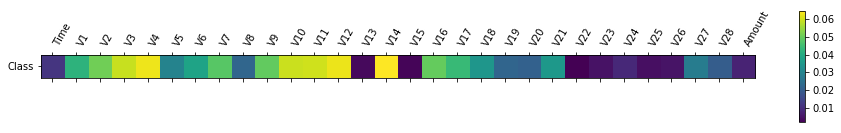

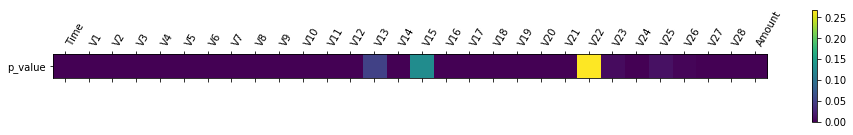

In [41]:
#https://medium.com/@outside2SDs/an-overview-of-correlation-measures-between-categorical-and-continuous-variables-4c7f85610365
corrD=dataScale.apply(lambda a:scipy.stats.spearmanr(dataClass,a)[0]).abs()
pValue=dataScale.apply(lambda a:scipy.stats.spearmanr(dataClass,a)[1])
plt.matshow([corrD.values])
plt.yticks([0],["Class"])
plt.colorbar()
plt.xticks(range(dataScale.shape[1]),dataScale.columns,rotation=60,ha="left");
plt.matshow([pValue.values])
plt.yticks([0],["p_value"])
plt.colorbar()
plt.xticks(range(dataScale.shape[1]),dataScale.columns,rotation=60,ha="left");


pas de correlation pour spearman mais confirm que V22,15,13 est vrmt pas correllé

#### <center>tau kendall</center>

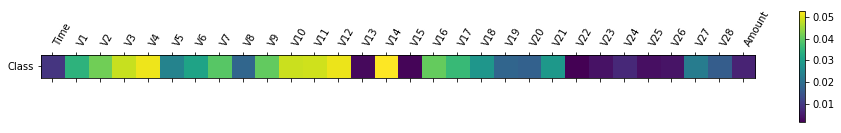

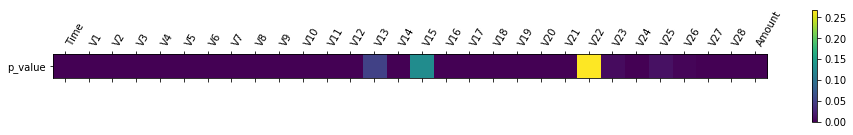

In [42]:
#https://medium.com/@outside2SDs/an-overview-of-correlation-measures-between-categorical-and-continuous-variables-4c7f85610365
corrD=dataScale.apply(lambda a:scipy.stats.kendalltau(dataClass,a)[0]).abs()
pValue=dataScale.apply(lambda a:scipy.stats.kendalltau(dataClass,a)[1])
plt.matshow([corrD.values])
plt.yticks([0],["Class"])
plt.colorbar()
plt.xticks(range(dataScale.shape[1]),dataScale.columns,rotation=60,ha="left");
plt.matshow([pValue.values])
plt.yticks([0],["p_value"])
plt.colorbar()
plt.xticks(range(dataScale.shape[1]),dataScale.columns,rotation=60,ha="left");


pas de correlation pour kendall mais confirme que V22,15,13 est vrmt pas correllé

### TODO
supprimer V22,V23, V25 ?

### <center>Etude Amount et Time</center>

Amount

Text(0.5,1,'Fraud')

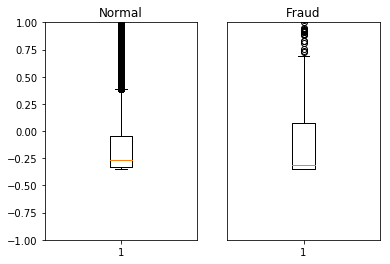

In [43]:
fig,ax=plt.subplots(1,2)
ax[0].boxplot(dataScale["Amount"][dataClass==0]);
ax[0].set_ylim([-1,1])
ax[0].set_title("Normal")
ax[1].boxplot(dataScale["Amount"][dataClass==1]);
ax[1].set_ylim([-1,1]);
ax[1].set_yticks([])
ax[1].set_title("Fraud")

retour au données initiale

In [44]:
data.Amount.groupby(dataClass).describe()

,count,mean,std,min,25%,50%,75%,max
Class,,,,,,,,
0,284315.0,88.291022,250.105092,0.0,5.65,22.00,77.05,25691.16
1,492.0,122.211321,256.683288,0.0,1.00,9.25,105.89,2125.87


On remarque que Amount a 75% est plus grand, ainsi quand mean<br>
il y a bcp d'outlier

Time

Text(0.5,1,'Fraud')

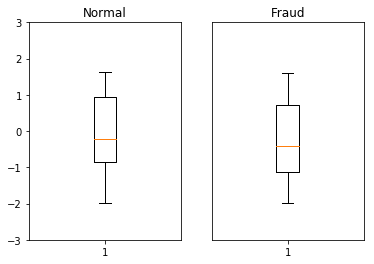

In [45]:
fig,ax=plt.subplots(1,2)
ax[0].boxplot(dataScale["Time"][dataClass==0]);
ax[0].set_ylim([-3,3])
ax[0].set_title("Normal")
ax[1].boxplot(dataScale["Time"][dataClass==1]);
ax[1].set_ylim([-3,3]);
ax[1].set_yticks([])
ax[1].set_title("Fraud")

In [46]:
data.Time.groupby(dataClass).describe()

,count,mean,std,min,25%,50%,75%,max
Class,,,,,,,,
0,284315.0,94838.202258,47484.015786,0.0,54230.0,84711.0,139333.0,172792.0
1,492.0,80746.806911,47835.365138,406.0,41241.5,75568.5,128483.0,170348.0


on veux pas grand chose

Creation d'un variable "Periode" -> toutes les 4h 

In [47]:
dataScale2=pd.concat([pd.Series(scale(data.Time%(60.*60.*4)),name="Period"),dataScale],axis=1)

In [48]:
dataScale2.Period.corr(dataClass)

0.0081384271770936628

0.0081384271770936628 > 0.004 Du coup corr significative

### <center>PREMIER MODEL</center>

##### <center>split</center>

In [234]:
trainx,testx,trainy,testy = train_test_split(dataScale2,dataClass,stratify=dataClass, random_state=42)

# <center>VERSION PIPELINE</center>

In [239]:
def pipelineLaunch(trainx,testx,trainy,testy):
    #LinearSVC,SVC -> long
    #penser a n_jobs=-1
    #ou autre solutions parralell
    algo=[\
        LogisticRegression(),
        LinearDiscriminantAnalysis(),
        QuadraticDiscriminantAnalysis(),
          GaussianNB(),
         #KNeighborsClassifier()
          #LinearSVC(),
         # SVC(),
         DecisionTreeClassifier(),
         RandomForestClassifier()
        ]
    z=pd.DataFrame()
    for i in tqdm(algo):
        i.fit(trainx,trainy)
        testP=i.predict(testx)
        trainP=i.predict(trainx)
        metricTrain=metrics(trainy,trainP)
        metrixTest=metrics(testy,testP)
        z=z.append(
            pd.DataFrame.from_records([("type","train")]+metricTrain,
                                      columns=["metrics",repr(i.__class__).split(".")[-1][:-2]],
                                      index="metrics").T
        ).append(
            pd.DataFrame.from_records([("type","test")]+metrixTest,
                                      columns=["metrics",repr(i.__class__).split(".")[-1][:-2]],
                                      index="metrics").T
        )
    return (z,algo)
        

In [240]:
res=pipelineLaunch(trainx,testx,trainy,testy) #LinearSVC,SVC,knn -> long ()

100%|██████████| 6/6 [00:49<00:00,  8.19s/it]


In [241]:
r=res[0]
#r

In [242]:
resTab=r.reset_index().set_index(["index","type"])
#.stack().to_frame(name="value")
resTab

metrics                                aucprc       auc       acc
index                         type                               
LogisticRegression            train  0.766936   0.82107  0.999246
                              test   0.731495  0.808845  0.999143
LinearDiscriminantAnalysis    train  0.817112   0.87931  0.999396
                              test   0.798247   0.88198  0.999326
QuadraticDiscriminantAnalysis train  0.472622  0.929286  0.977646
                              test   0.458412  0.915827  0.977782
GaussianNB                    train  0.447138    0.9051  0.977969
                              test   0.440464  0.899335  0.977262
DecisionTreeClassifier        train         1         1         1
                              test   0.710158  0.841252  0.999031
RandomForestClassifier        train  0.971594  0.971545  0.999902
                              test   0.861909  0.882086  0.999537

Decision TRee et Random Forrest->gros surapprentissage

GaussianNB et QuadraticDiscriminantAnalysis  -> a ameliorer ou enlever

LogisticRegression	et LinearDiscriminantAnalysis -> a ameliorer si possinle

### TODO
appliquer des tech pour umbalance classe (SMOTE, ROSE, etc) 
[more ?](https://shiring.github.io/machine_learning/2017/04/02/unbalanced)

# <center>VERSION SEQUENTIEL (mieux expliqué)</center>

###  <center>Regression Logistique + Selection de Variable</center>

observations to be independent of each other.
no multicollinearity among the independent variables
[why?](https://www.statisticssolutions.com/assumptions-of-logistic-regression/)

In [88]:
repr(RegLog.__class__).split(".")[-1]

NameError: name 'RegLog' is not defined

In [89]:
RegLog=LogisticRegression(C=10,n_jobs=-1,penalty="l1").fit(trainx,trainy)
RegLog.fit(trainx,trainy)

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))


LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=-1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [90]:
metrics(trainy,RegLog.predict(trainx))

[('aucprc', 0.75900228125729063),
 ('auc', 0.81564781258685048),
 ('acc', 0.99922286463331855)]

In [91]:
metrics(testy,RegLog.predict(testx))

[('aucprc', 0.75113360145596808),
 ('auc', 0.80887274516606222),
 ('acc', 0.99919946068930643)]

In [92]:
dummyMetrics2=dummyMetrics.append(
    pd.DataFrame.from_records(metrics(testy,RegLog.predict(testx)),columns=["metrics","LogReg"],index="metrics").T
)
dummyMetrics2

metrics,aucprc,auc,acc
Dummy,0.500864,0.500000,0.998273
LogReg,0.751134,0.808873,0.999199


pb test meilleur que train (surapprentissage) malgres le changement de C | peut etre faire cv 

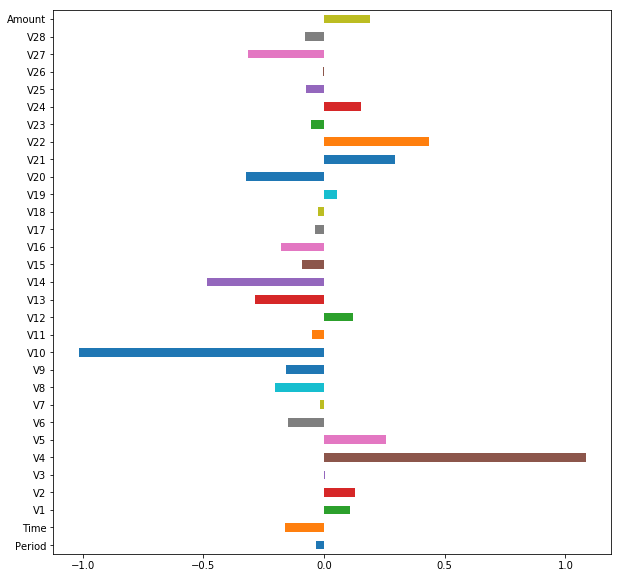

In [158]:
pd.Series(RegLog.coef_[0],index=dataScale2.columns).plot.barh(figsize=(10,10));
plt.yticks(rotation=0);

In [159]:
pd.Series(RegLog.coef_[0],index=dataScale2.columns).abs().sort_values(ascending=F)[:6]

V4     1.085200
V10    1.017194
V14    0.483930
V22    0.432999
V20    0.324574
V27    0.313734
dtype: float64

Les variables les plus correlées aux classes sont: (V4, V10), V14, V22, V20, V27

In [80]:
search=np.append(np.arange(0.01,0.1,0.01),(np.arange(0.1,1,0.2)))
logRegFit=lambda c,:LogisticRegression(C=c).fit(trainx,trainy)
def logRegPred(c): l=logRegFit(c);return (AUCPRC(trainy,l.predict(trainx))[0][1],AUCPRC(testy,l.predict(testx))[0][1])
#grid=[logRegPred(i) for i in tqdm(search)]


100%|██████████████████████████████████████████████████████████████| 14/14 [01:09<00:00,  5.00s/it]


In [96]:
#plt.plot(range(len(search)),np.array(grid)[:,0])
#plt.plot(range(len(search)),np.array(grid)[:,1])
#plt.xticks(range(len(search)),np.round(search,3).astype("str"));

### TODO: 
Selection des meilleurs variable<br>
Les combiner (polynome)

### <center>LDA</center> 
normality, same variance each variable (peux etre lié modele de melange, vu que minimise le ratio S_W/S_B) <br>
[more?](https://machinelearningmastery.com/linear-discriminant-analysis-for-machine-learning/)

### TODO: 
have to check normality<br>

In [57]:
ldaDataScale=LinearDiscriminantAnalysis()
dataScaleLDA=ldaDataScale.fit_transform(trainx,trainy)

In [58]:
ldaPredict = ldaDataScale.predict(testx)

In [59]:
metrics(trainy,ldaDataScale.predict(trainx))

[('aucprc', 0.81327248758332227),
 ('auc', 0.88065563551581794),
 ('acc', 0.99938203693733763)]

In [60]:
metrics(testy,ldaDataScale.predict(testx))

[('aucprc', 0.82286593628714744),
 ('auc', 0.8901383860417762),
 ('acc', 0.99941012892896264)]

In [200]:
dummyMetrics3=dummyMetrics2.append(
    pd.DataFrame.from_records(metrics(testy,ldaPredict),columns=["metrics","LDA"],index="metrics").T
)
dummyMetrics3

metrics,aucprc,auc,acc
Dummy,0.500864,0.500000,0.998273
LogReg,0.779563,0.829205,0.999284
LDA,0.822866,0.890138,0.999410


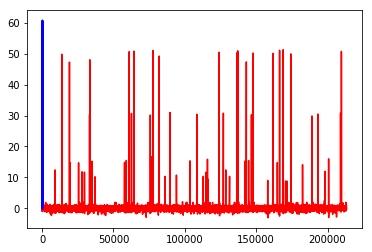

In [62]:
plt.plot(dataScaleLDA[trainy==0],color="red")
plt.plot(dataScaleLDA[trainy!=0],color="blue")

juste avec lda on est à 0.80 >> 0.5

### <center>QDA</center>
Each class uses its own estimate of variance (or covariance when there are multiple input variables).<br>
[more ?](http://uc-r.github.io/discriminant_analysis)

In [172]:
QdaDataScale=QuadraticDiscriminantAnalysis()
QdaDataScale.fit(trainx,trainy)

QuadraticDiscriminantAnalysis(priors=None, reg_param=0.0,
               store_covariance=False, store_covariances=None, tol=0.0001)

In [173]:
QdaPredict = QdaDataScale.predict(testx)

In [174]:
metrics(trainy,QdaDataScale.predict(trainx))

[('aucprc', 0.46189347065313913),
 ('auc', 0.91956648437312938),
 ('acc', 0.97714472975819855)]

In [175]:
metrics(testy,QdaDataScale.predict(testx))

[('aucprc', 0.47924110724670493),
 ('auc', 0.93583607933323243),
 ('acc', 0.97721974101851072)]

In [201]:
dummyMetrics4=dummyMetrics3.append(
    pd.DataFrame.from_records(metrics(testy,QdaPredict),columns=["metrics","QDA"],index="metrics").T
)
dummyMetrics4

metrics,aucprc,auc,acc
Dummy,0.500864,0.500000,0.998273
LogReg,0.779563,0.829205,0.999284
LDA,0.822866,0.890138,0.999410
QDA,0.479241,0.935836,0.977220


### TODO:
modele de melange supervisé ?

## <center>NaiveBayes</center>

 assumption of independence among predictors<br>
 si bernouliNB -> on pense que les feature sont 0-1<br>
 si GaussianNB -> on pense que les feature sont gaussien<br>
 si Multinomial ->  It is used for discrete counts<br>
[more?](https://www.analyticsvidhya.com/blog/2017/09/naive-bayes-explained/)


In [181]:
naiveBayes=Gau()
naiveBayes.fit(trainx,trainy)

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [183]:
metrics(trainy,naiveBayes.predict(trainx))

[('aucprc', 0.72457782194151354),
 ('auc', 0.81424355782041002),
 ('acc', 0.99911987078954145)]

In [185]:
metrics(testy,naiveBayes.predict(testx))

[('aucprc', 0.74282853434089446),
 ('auc', 0.8291487074327123),
 ('acc', 0.9991713715906857)]

In [203]:
dummyMetrics5=dummyMetrics4.append(
    pd.DataFrame.from_records(metrics(testy,naiveBayes.predict(testx)),columns=["metrics","NB"],index="metrics").T
)
dummyMetrics5

metrics,aucprc,auc,acc
Dummy,0.500864,0.500000,0.998273
LogReg,0.779563,0.829205,0.999284
LDA,0.822866,0.890138,0.999410
QDA,0.479241,0.935836,0.977220
NB,0.742829,0.829149,0.999171


## <center>KNN</center>

Knn relou si grand

/!\ knn met cent ans ne pas le faire !

In [ ]:
def knnLaunch():
    knn=KNeighborsClassifier(n_neighbors=10)
    knn.fit(trainx,trainy)
    metrics(trainy,knn.predict(trainx))
    metrics(testy,knn.predict(testx))
    return knn
#knnMod=knnLaunch()

In [ ]:
#dummyMetrics5=dummyMetrics4.append(
#    pd.DataFrame.from_records(metrics(testy,knnMod.predict(testx)),columns=["metrics","NB"],index="metrics").T
#)
#dummyMetrics5

## <center>SVM</center>

In [ ]:
def svmLaunch():
    knn=SVC()
    knn.fit(trainx,trainy)
    metrics(trainy,knn.predict(trainx))
    metrics(testy,knn.predict(testx))
    return knn